In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"norihisa","key":"d016ea67c3249f44d2090f6c16a2ade1"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!pip install kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
# ※kaggleのサイトで認証が必要
!kaggle datasets download -d paramaggarwal/fashion-product-images-small

 95% 537M/565M [00:05<00:00, 91.4MB/s]
100% 565M/565M [00:05<00:00, 102MB/s] 


In [6]:
!unzip fashion-product-images-small.zip

Output hidden; open in https://colab.research.google.com to view.

In [7]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

Using TensorFlow backend.


In [0]:
files = []
for i, x in enumerate(os.listdir('/content/images/')):
  if 'jpg' in x:
    files.append('/content/images/' + x)
  if i >= 3000:
    break

In [0]:
imgs_path = "../content/images/"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 5

In [10]:
vgg_model = vgg16.VGG16(weights='imagenet')

# 予測の代わりに特徴量を取得するために、最後のFC層を削除する
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# モデルを表示
feat_extractor.summary()





553467904/553467096 [==============================] - 15s 0us/step






Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_______________________________________________

In [0]:
importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [12]:
imgs_features = feat_extractor.predict(processed_imgs)
imgs_features.shape

(3001, 4096)

In [13]:
cosSimilarities = cosine_similarity(imgs_features)

# 結果をPandasのデータフレームに保存する。
cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,/content/images/12344.jpg,/content/images/44100.jpg,/content/images/4410.jpg,/content/images/22912.jpg,/content/images/40428.jpg,/content/images/27197.jpg,/content/images/23555.jpg,/content/images/41754.jpg,/content/images/48487.jpg,/content/images/33056.jpg,/content/images/17618.jpg,/content/images/56436.jpg,/content/images/45618.jpg,/content/images/40946.jpg,/content/images/47532.jpg,/content/images/39119.jpg,/content/images/31552.jpg,/content/images/8467.jpg,/content/images/1902.jpg,/content/images/58611.jpg,/content/images/48202.jpg,/content/images/43844.jpg,/content/images/58470.jpg,/content/images/29917.jpg,/content/images/12517.jpg,/content/images/34988.jpg,/content/images/5432.jpg,/content/images/5489.jpg,/content/images/32252.jpg,/content/images/49564.jpg,/content/images/29107.jpg,/content/images/13249.jpg,/content/images/38791.jpg,/content/images/46169.jpg,/content/images/11113.jpg,/content/images/7394.jpg,/content/images/28358.jpg,/content/images/45325.jpg,/content/images/27449.jpg,/content/images/11478.jpg,...,/content/images/15935.jpg,/content/images/40112.jpg,/content/images/59432.jpg,/content/images/54475.jpg,/content/images/40005.jpg,/content/images/5190.jpg,/content/images/6852.jpg,/content/images/51173.jpg,/content/images/7940.jpg,/content/images/37955.jpg,/content/images/11229.jpg,/content/images/48236.jpg,/content/images/40398.jpg,/content/images/51042.jpg,/content/images/40969.jpg,/content/images/38574.jpg,/content/images/56008.jpg,/content/images/53069.jpg,/content/images/26427.jpg,/content/images/15891.jpg,/content/images/11932.jpg,/content/images/51178.jpg,/content/images/54405.jpg,/content/images/53140.jpg,/content/images/17066.jpg,/content/images/38213.jpg,/content/images/50967.jpg,/content/images/30514.jpg,/content/images/34282.jpg,/content/images/5620.jpg,/content/images/28425.jpg,/content/images/29224.jpg,/content/images/33963.jpg,/content/images/24964.jpg,/content/images/18998.jpg,/content/images/38933.jpg,/content/images/22043.jpg,/content/images/11948.jpg,/content/images/30497.jpg,/content/images/20011.jpg
/content/images/12344.jpg,1.000000,0.400194,0.490600,0.386818,0.444938,0.380256,0.429547,0.495078,0.380689,0.362590,0.324183,0.374391,0.291516,0.425615,0.286630,0.435454,0.395937,0.440590,0.380042,0.357177,0.355530,0.365266,0.353600,0.317802,0.303533,0.473060,0.351487,0.400098,0.407490,0.287921,0.341048,0.369929,0.420174,0.353844,0.458203,0.320729,0.347081,0.429503,0.418252,0.460331,...,0.258294,0.378655,0.296532,0.410092,0.351328,0.484309,0.349235,0.360645,0.388932,0.302036,0.347454,0.324222,0.486305,0.490381,0.292512,0.443143,0.402406,0.296189,0.370143,0.354582,0.302118,0.411012,0.377300,0.449395,0.385568,0.281409,0.409309,0.302844,0.439503,0.355006,0.326620,0.380553,0.247304,0.437609,0.379478,0.402810,0.459991,0.346113,0.413886,0.427170
/content/images/44100.jpg,0.400194,1.000000,0.384285,0.330213,0.484276,0.321106,0.640770,0.465842,0.409684,0.374606,0.582805,0.626812,0.326139,0.406787,0.316856,0.416591,0.346099,0.389884,0.347236,0.600420,0.418055,0.387835,0.538440,0.375850,0.277806,0.481922,0.375170,0.366874,0.434623,0.365932,0.377862,0.523940,0.376525,0.260841,0.428422,0.262729,0.467840,0.324556,0.395528,0.390193,...,0.362017,0.399665,0.463285,0.356548,0.435472,0.422792,0.378792,0.542724,0.370914,0.449893,0.463999,0.417151,0.433490,0.342190,0.332066,0.535141,0.407084,0.375786,0.373251,0.272820,0.302761,0.488746,0.419031,0.387985,0.359973,0.372147,0.379114,0.375610,0.372645,0.275763,0.454023,0.320860,0.293234,0.400974,0.359511,0.453552,0.455832,0.339956,0.372658,0.474095
/content/images/4410.jpg,0.490600,0.384285,1.000000,0.385522,0.518013,0.415531,0.403481,0.504208,0.545121,0.663279,0.346483,0.375492,0.351129,0.484411,0.300012,0.489423,0.364377,0.572257,0.709150,0.396190,0.333170,0.419922,0.366665,0.426094,0.277094,0.544633,0.406740,0.652950,0.521279,0.349862,0.415585,0.415321,0.768316,0.365189,0.633328,0.328535,0.358732,0.418449,0.522335,0.801826,...,0.314254,0.400214,0.365048,0.396854,

In [0]:
def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


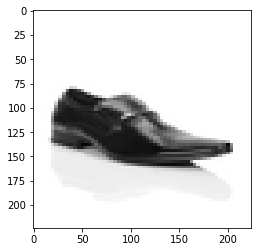

-----------------------------------------------------------------------
most similar products:


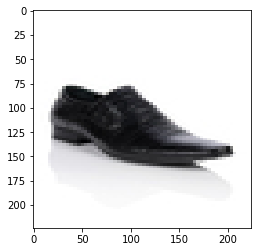

similarity score :  0.89427125


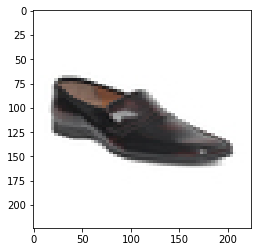

similarity score :  0.77237177


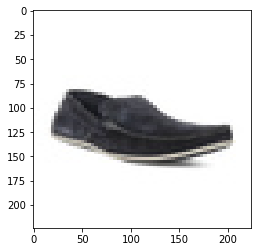

similarity score :  0.76919407


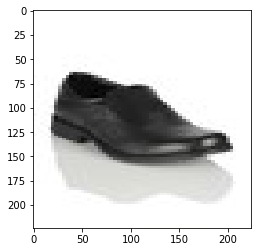

similarity score :  0.7506414


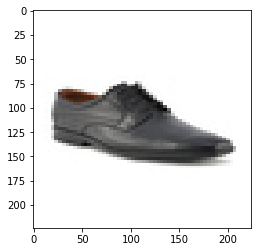

similarity score :  0.7413777


In [15]:
retrieve_most_similar_products(files[1200])

In [16]:
df = pd.read_csv('/content/fashion-dataset/styles.csv', error_bad_lines = False)

FileNotFoundError: ignored

In [0]:
df.head(10)